In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
dfx=pd.read_csv("Linear_X_Train.csv")
dfy=pd.read_csv("Linear_Y_Train.csv")
x_train=dfx.values
y_train=dfy.values

In [22]:
print(x_train.shape)
print(y_train.shape)

(3750, 1)
(3750, 1)


In [23]:
print(x_train)
print(y_train)

[[-0.28930742]
 [-0.58880963]
 [ 1.02750749]
 ...
 [-0.30516366]
 [ 1.67583291]
 [-0.49175724]]
[[-9.11011171e-02]
 [-5.34677208e+01]
 [ 7.54570088e+01]
 ...
 [-3.49832749e+01]
 [ 1.45206092e+02]
 [-1.71244939e+01]]


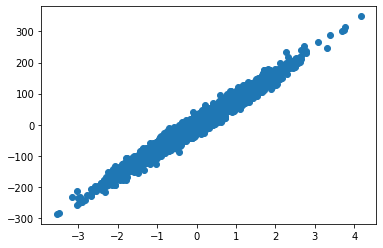

In [24]:
x_train=(x_train-x_train.mean())/x_train.std()
plt.scatter(x_train,y_train)
plt.show()

In [25]:
print(type(x_train))

<class 'numpy.ndarray'>


In [35]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def loss(x,y,theta):
    loss=0
    m=x_train.shape[0]
    
    for i in range(m):
        hx=hypothesis(x[i],theta)
        loss  += (hx-y[i])**2
        
    return loss

def gradient(x,y,theta):
    
    grad=np.zeros((2,))
    m=x.shape[0]
    for i in range(m):
        hx=hypothesis(x[i],theta)
        grad[0] += hx-y[i]
        grad[1] += (hx-y[i])*x[i]
    
    return grad

def gradient_descent(x,y,learning_rate=0.0001):
    theta=np.zeros((2,))
    error_list =[]

    for i in range(20):
        grad=gradient(x,y,theta)
        err=loss(x,y,theta)
        error_list.append(err)
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
    
    return theta,error_list
    

In [36]:
theta,error_list=gradient_descent(x_train,y_train)
print(theta)


[ 0.6838124  79.89912729]


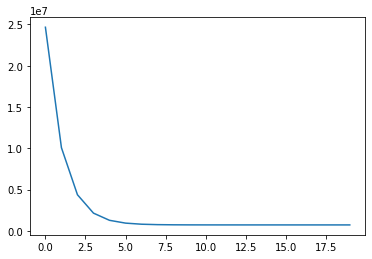

In [37]:
plt.plot(error_list)
plt.show()

In [38]:
dfx_test=pd.read_csv("Linear_X_Test.csv")
x_test=dfx_test.values
m=x_test.shape[0]
y_pred=[]
for i in range(m):
    hx=hypothesis(x_test[i],theta)
    y_pred.append(hx)
    
y_pred=np.array(y_pred)
print(y_pred)

[[-149.36230739]
 [ -68.75107927]
 [-201.47555522]
 ...
 [  10.91152559]
 [ -21.53114838]
 [ -53.68158552]]


In [40]:
print(error_list[-1])

[716083.84207721]


In [39]:
df=pd.DataFrame(y_pred,columns=["y"])
df.to_csv("submission3.csv",index=False)